In [3]:
import logging
import numpy as np
import pandas as pd
from tqdm import tqdm
from pax import core
import multihist
import sys
import os
import scipy.integrate as integrate
from runDB import get_name
import stat
import shutil
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
def get_run(run):
    mypax = core.Processor(config_names='XENON1T', config_dict={
        'pax': {
            'plugin_group_names': ['input', 'preprocessing'],
            'preprocessing':      ['CheckPulses.SortPulses',
                                   'CheckPulses.ConcatenateAdjacentPulses',],
            'input':              'Zip.ReadZipped',
            'encoder_plugin':     None,
            #'decoder_plugin':     'BSON.DecodeZBSON',
            'input_name':          run
        }
    })
    return mypax

In [5]:
from spe_acceptance import get_name
from spe_acceptance import rawdata_dir
LED_run=18287
run_name = get_name(LED_run)
run_name=os.path.join(rawdata_dir, run_name)
processor = get_run(run_name)

processor MainProcess L66 INFO This is PAX version 6.8.0, running with configuration for XENON1T.
ReadZipped MainProcess L102 INFO InputFromFolder: Selecting file /project/lgrandi/xenon1t/spe_acceptance/rawdata/180409_1626/XENON1T-18287-000000000-000000999-000001000.zip (number 1/197 in folder) for reading


In [6]:
# generator used to loop over events
def get_events(RUN):
    for event in RUN.get_events():
        event = RUN.process_event(event)
        yield event

In [7]:
N = processor.input_plugin.number_of_events

In [8]:
event_generator = get_events(processor)
N = 100

n_channels=254
channels=np.ones(n_channels)
medians = []
baselines = []
diff_1=[]
diff_2=[]

for i in tqdm(range(N)):
    event = next(event_generator)
    
    for ch, p in enumerate(event.pulses):
        w=p.raw_data
        channels[ch]=p.channel
        baseline1 = np.median(w)
        baseline2 = p.baseline
        medians.append(baseline1)
        baselines.append(baseline2)
        #diff_1.append(baseline1-w)
        #diff_2.append(baseline2-w)
        
    

100%|██████████| 100/100 [00:03<00:00, 28.03it/s]


In [11]:
medians

[15999.0,
 16004.0,
 16002.0,
 16001.0,
 16008.0,
 16003.0,
 16002.0,
 16000.0,
 16000.0,
 16001.0,
 16001.0,
 16001.0,
 15999.0,
 16001.0,
 16000.0,
 16001.0,
 16002.0,
 16001.0,
 16000.0,
 16001.0,
 16010.0,
 16001.0,
 16002.0,
 16014.0,
 16000.0,
 16000.0,
 16000.0,
 16001.0,
 16002.0,
 16001.0,
 16003.0,
 16007.0,
 15999.0,
 16002.0,
 16000.0,
 16002.0,
 15998.0,
 15999.0,
 16005.0,
 16001.0,
 16002.0,
 16005.0,
 16000.0,
 16001.0,
 16000.0,
 16000.0,
 16001.0,
 16001.0,
 16003.0,
 16000.0,
 15999.0,
 16001.0,
 16002.0,
 16000.0,
 16000.0,
 16008.0,
 16004.0,
 16000.0,
 16000.0,
 16002.0,
 16001.0,
 16001.0,
 16005.0,
 15998.0,
 16010.0,
 16000.0,
 16005.0,
 16000.0,
 16004.0,
 16002.0,
 16001.0,
 16000.0,
 16008.0,
 16001.0,
 16001.0,
 16001.0,
 16001.0,
 16001.0,
 16001.0,
 16001.0,
 16000.0,
 16009.0,
 15999.0,
 16001.0,
 16000.0,
 16003.0,
 16004.0,
 15998.0,
 15999.0,
 16009.0,
 16008.0,
 16015.0,
 16004.0,
 16000.0,
 16002.0,
 16000.0,
 16001.0,
 16007.0,
 16004.0,
 16001.0,


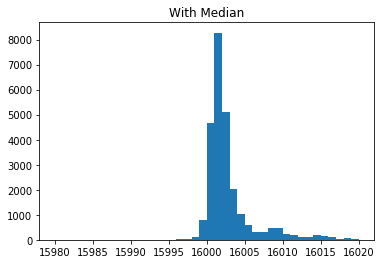

In [13]:
plt.hist(medians, bins=40, range=(15980, 16020))
plt.title("With Median")
plt.show()

In [15]:
baselines

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

/project/lgrandi/anaconda3/envs/pax_v6.8.0/lib/python3.4/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/project/lgrandi/anaconda3/envs/pax_v6.8.0/lib/python3.4/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


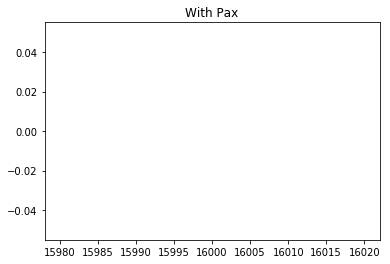

In [14]:
plt.hist(baselines, bins=40, range=(15980, 16020))
plt.title("With Pax")
plt.show()